## Contrary Observation Analysis (Aykiri Gozlem Analizi)
### (Aykiri Degeri Yakalamak)

In [1]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df_table = df['table']

In [3]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

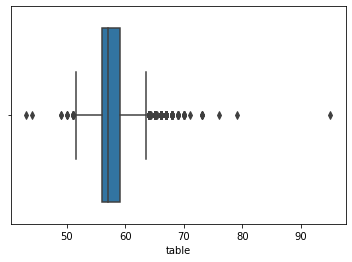

In [4]:
sns.boxplot(x = df_table);

In [5]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

In [7]:
Q1

56.0

In [8]:
Q3

59.0

In [9]:
IQR

3.0

In [17]:
alt_sinir = Q1- 1.5* IQR
ust_sinir = Q3+ 1.5* IQR

In [18]:
alt_sinir

51.5

In [19]:
ust_sinir

63.5

In [20]:
df_table < alt_sinir

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [21]:
(df_table < alt_sinir) | (df_table > ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [22]:
aykiri_tf = (df_table < alt_sinir)

In [23]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [24]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [25]:
df_table[aykiri_tf].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

In [ ]:
### Aykiri degerleri bxplot degerleri ile yakaladik,ki en cok kullanilan degerlerden birisidir,
###kutu grafik yontemi ile ust siniri alt siniri belirledik, 
### daha once belirlemis oldugunu altsiniri ustsinira gore bir sorgulama islemi gerceklestirdik

### (df_table < alt_sinir) | (df_table > ust_sinir) burada ya da diyerek hepsini sorguladik
### aykiri_tf = (df_table < alt_sinir) buradada takip etmek adina assagi yonde olanlari sorgulamis olduk yani alt sinir degerinden daha 
### assagida olan gozlemler nelerdir sorgusunu attik ve bunu true fase olarak kaydettik 

### daha sonra bunu df_table[aykiri_tf] a gonderdigimizde true sartini yakalayanlari bize cekip getirdi
### yani simdi aykiri gozlemleri yakaladik 





## Solving the Outlier Problem (Aykırı Değer Problemini Çözmek)

In [27]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

### Delete (Silme)

In [28]:
import pandas as pd

In [29]:
type(df_table)

pandas.core.series.Series

In [30]:
df_table = pd.DataFrame(df_table)

In [31]:
df_table.shape

(53940, 1)

In [32]:
t_df = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis = 1)]

In [33]:
t_df.shape

(53335, 1)

### Fill with Average (Ortalama ile Doldurma)

In [34]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [35]:
df_table = df["table"]

In [36]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [37]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [38]:
df_table.mean()

57.45718390804603

In [39]:
df_table[aykiri_tf] = df_table.mean()

<ipython-input-39-57ba1f56a480>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = df_table.mean()


In [40]:
df_table[aykiri_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

### Suppression Method (Baskılama Yöntemi)

In [ ]:
##Aykirilari yakaladik onlari sildik
##Aykirilari yakaladik ortalama ile doldurduk 
##Baskilama yonteminde ise aykirilar yakalandiktan sonra ust taraftaysa ust sinir degere esitlenir
##alt taraftaysa alt sinir degerine esitlenir. 
##yani boylece aslinda aykiri degerlerin veri setini yukari yonlu ya da assagiya cekme cabasi goz onunde bulundurulmus olup
##onlari ortama ile degistirmekten cok daha mantikli bir aksor alinmis olur

In [42]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [44]:
df_table = df["table"]

In [45]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [46]:
alt_sinir

51.5

In [47]:
df_table[aykiri_tf] = alt_sinir

<ipython-input-47-e2f0da25fd88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = alt_sinir


In [48]:
df_table[aykiri_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

## Multivariate Outlier Analysis (Çok Değişkenli Aykırı Gözlem Analizi)

### Local Outlier Factor

In [51]:

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer
olabilecek değerleri tanımlayabilmemize imkan sağlıyor.

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. 
Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise -
bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor.
Dolayısıyla burada bir komşuluk yapısı söz konusu. 
Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.




SyntaxError: invalid syntax (<ipython-input-51-4221e22ef1f8>, line 1)

In [52]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [53]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [54]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [55]:
df_scores = clf.negative_outlier_factor_

In [56]:
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [57]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.37081214, -4.29842288, -4.10492387, -4.0566648 ,
       -4.01831733, -3.94882806, -3.82378797, -3.80135297, -3.75680919,
       -3.65947378, -3.59249261, -3.55564138, -3.47157375, -3.45066056])

In [58]:
esik_deger = np.sort(df_scores)[13]


In [59]:
aykiri_tf = df_scores > esik_deger

In [60]:
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

### Delete method (silme yöntemi)

In [61]:
yeni_df  = df[df_scores > esik_deger]

In [62]:
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [63]:
df[df_scores == esik_deger]

,carat,depth,table,price,x,y,z
38053,0.34,54.0,56.0,1012,4.8,4.76,2.58


In [64]:
baski_deger = df[df_scores == esik_deger]

In [65]:
aykirilar = df[~aykiri_tf]

In [66]:
aykirilar.to_records(index = False)

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.34, 54. , 56. ,  1012, 4.8 ,  4.76,  2.58),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [68]:
res = aykirilar.to_records(index = False)

In [69]:
res[:] = baski_deger.to_records(index = False)

In [ ]:
res

In [70]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38053,0.34,54.0,56.0,1012,4.80,4.76,2.58
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [71]:
import pandas as pd
df[~aykiri_tf] = pd.DataFrame(res, index = df[~aykiri_tf].index)

In [72]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,0.34,54.0,56.0,1012,4.8,4.76,2.58
10377,0.34,54.0,56.0,1012,4.8,4.76,2.58
24067,0.34,54.0,56.0,1012,4.8,4.76,2.58
31230,0.34,54.0,56.0,1012,4.8,4.76,2.58
36503,0.34,54.0,56.0,1012,4.8,4.76,2.58
38053,0.34,54.0,56.0,1012,4.8,4.76,2.58
38840,0.34,54.0,56.0,1012,4.8,4.76,2.58
41918,0.34,54.0,56.0,1012,4.8,4.76,2.58
45688,0.34,54.0,56.0,1012,4.8,4.76,2.58
48410,0.34,54.0,56.0,1012,4.8,4.76,2.58


# Missing Data Analysis (Eksik Veri Analizi)

## Quick Solution (Hızlı Çözüm)

In [13]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [14]:
df.isnull().sum()       #bunu yazinca her bir degiskendeki eksik deger sayisini bize vermis oldu

V1    2
V2    3
V3    2
dtype: int64

In [15]:
df.notnull().sum()        #notnull yani bos olmaya dersek tam olan gozlemlerin sayilarinida getirmis oldu

V1    7
V2    6
V3    7
dtype: int64

In [16]:
df.isnull().sum().sum()  # bunu yazarak veri setindeki toplam eksik degerlere erismis oluyoruz

7

In [17]:
df.isnull() #sunu sormus olduk eksiklik varmi yok mu

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [18]:
df[df.isnull().any(axis = 1)] #burada sunu demis oluyorz en az bir eksik var sec demis oluyorz

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [19]:
df[df["V1"].notnull() & df["V2"].notnull()& df["V3"].notnull()]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [20]:
df[df.notnull().all(axis = 1)] #df icinde dolu olanlari degil hepsi dolu olanlari getir demis oluyoruz

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [21]:
df[df["V1"].notnull() & df["V2"].notnull()& df["V3"].notnull()] # yukaridaki ile ayni yazilisi farkli all kullanmadan yazdim

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [22]:
#eksik degerlerin direk silinmesi

In [23]:
df.dropna() #bunu yazdigimizda veri setindeki butun eksiklikler siliniyor

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [24]:
df   #goruldugu uzere kalici degisiklik olmadi

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [25]:
df.dropna(inplace = True) # bunu bu sekilde yazinca bu degisiklik kalicibir sekilde gerceklesmis oldu

In [26]:
df

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [27]:
#basit deger atama

In [28]:
df["V1"]

2     6.0
4     7.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [29]:
df["V1"].mean()

9.25

In [30]:
df["V1"].fillna(df["V1"].mean()) #bunu yazinca kendi ortalamasi ile doldur dedik ve na yerini 6'lar aldi

2     6.0
4     7.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [31]:
df["V2"].fillna(0) #elimizdeki ortalama ile degil istemis oldugumuz deger ile doldurduk 

2     5.0
4    12.0
7     2.0
8     3.0
Name: V2, dtype: float64

In [32]:
df.apply(lambda x: x.fillna(x.mean()), axis = 0)

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## Visualization of Missing Data Structure (Eksik Veri Yapısının Görselleştirilmesi)

In [33]:
!pip install missingno

In [34]:
import missingno as msno

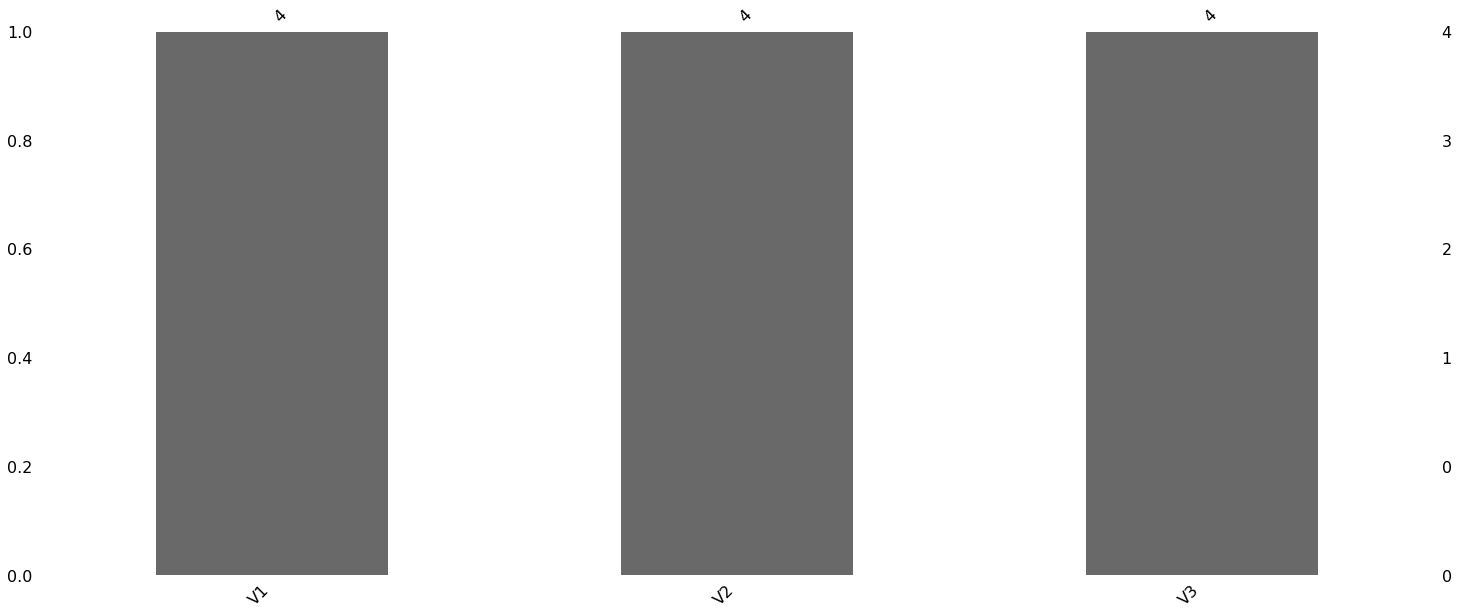

In [35]:
msno.bar(df); #Veri seti icerisindeki degiskenler gorsellestirilmis durumda,
              #yani degiskenlerdeki eksikligi oransal olarak bu grafik ifade ediyo 

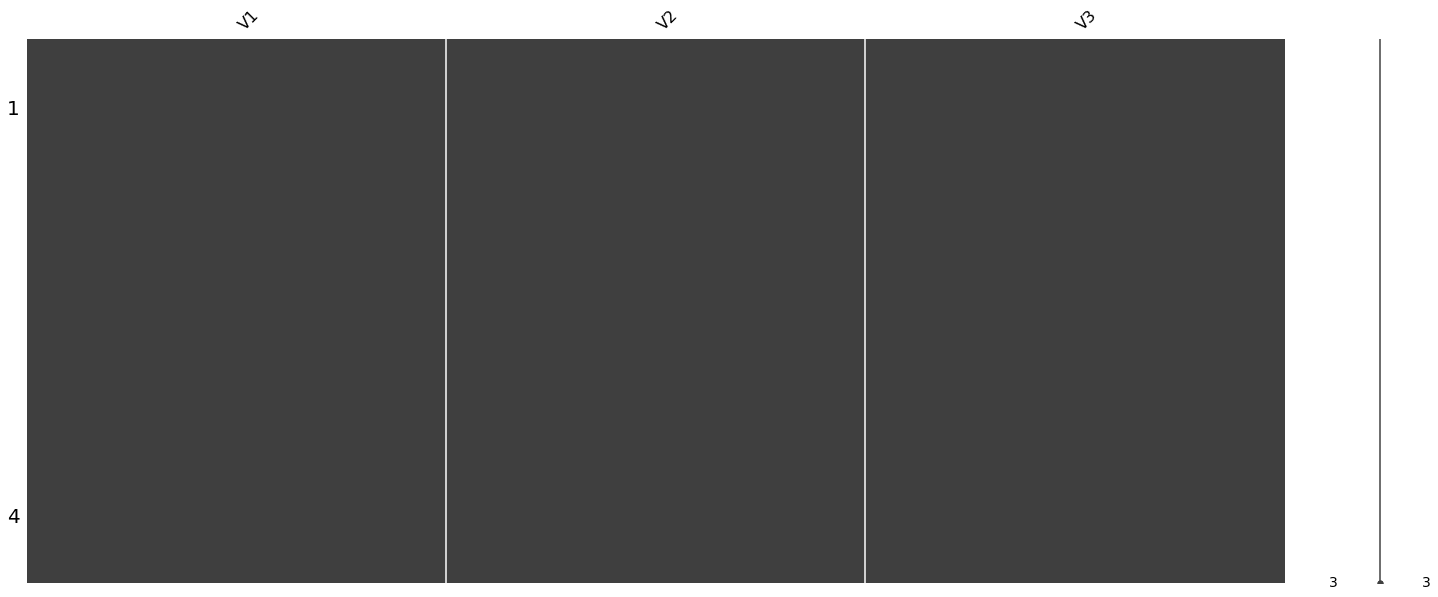

In [36]:
msno.matrix(df); #Bu grafikte bize bahsetmisd oldugumuz eksik degerlerin rastsalligi ile ilgili gerekli yapisal bozukluklari 
                 #yakalama imkani veren bi gorsel ve basit bir data frame uzerinden bun yaptik
#  Bu grafik bize gozlemleri   

In [38]:
df

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [39]:
import seaborn as sns
df = sns.load_dataset('planets')
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [40]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

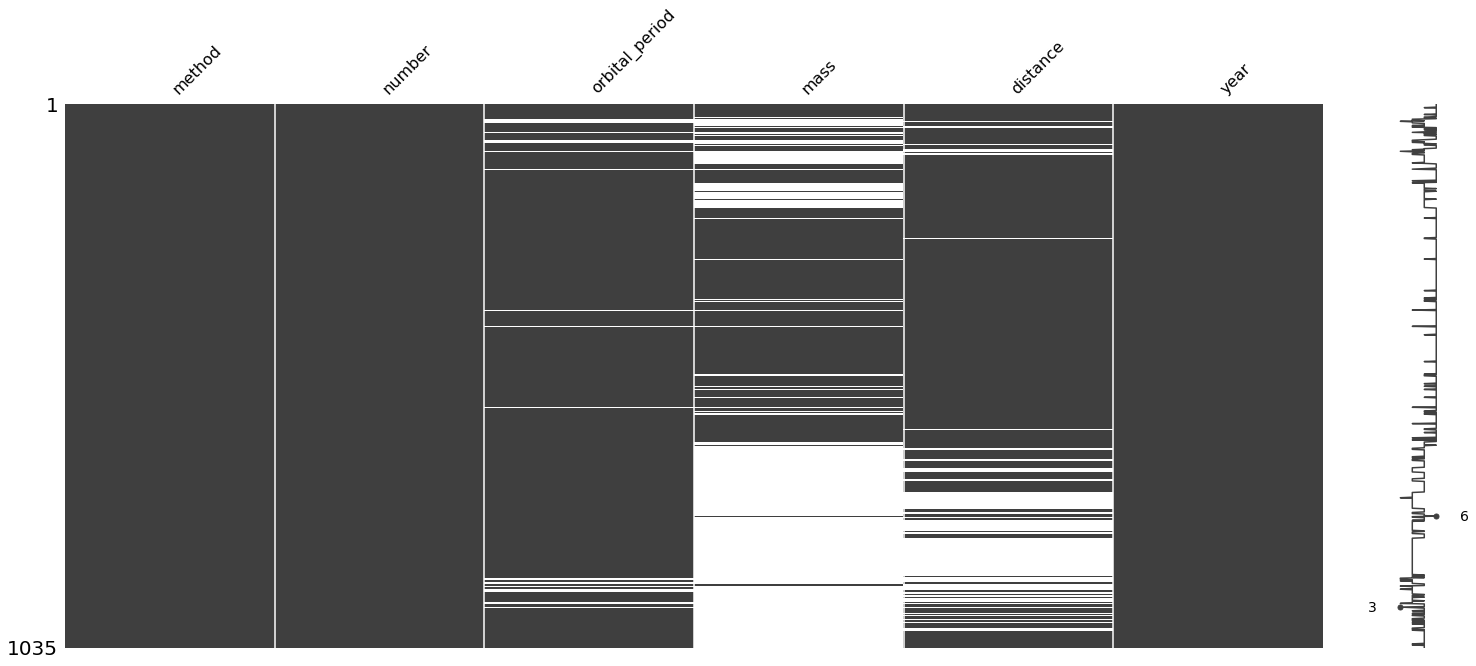

In [41]:
msno.matrix(df);

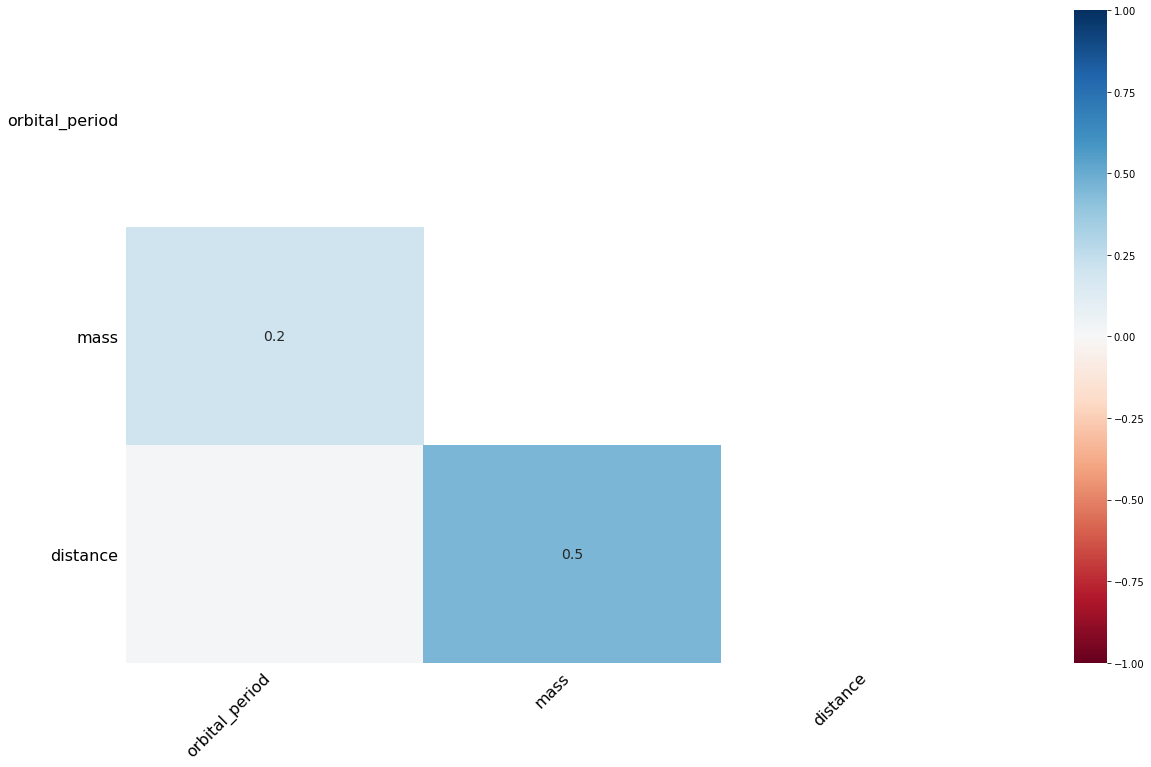

In [42]:
msno.heatmap(df);

In [ ]:
## Deletion Methods (Silme Yöntemleri)

In [43]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [44]:
df.dropna() #boyle yazdigimizda en az bir eksik olan tum gozlem birimleri silinmis oldu 

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [45]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [46]:
df.dropna(how = "all") # burada all derken hepsi ayni anda eksik ise bunlari sil demis oluyoruz ve 6.gozlem silinmis oldu

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [47]:
df.dropna(axis = 1)

""
0
1
2
3
4
5
6
7
8


In [58]:
df.dropna(axis = 1, how = "all") # bunu yazdigimizda tum degerleri Na olan degerleri silecek
                                # suanda tum degerleri Na olan bi ddeger olmadigi icin bu silme islemi gerceklesmiyecek

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [59]:
df['sil_beni'] = np.nan

In [60]:
df

,V1,V2,V3,sik_beni,sil_beni
0,1.0,7.0,NaN,NaN,NaN
1,3.0,NaN,12.0,NaN,NaN
2,6.0,5.0,5.0,NaN,NaN
3,NaN,8.0,6.0,NaN,NaN
4,7.0,12.0,14.0,NaN,NaN
5,1.0,NaN,7.0,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,9.0,2.0,2.0,NaN,NaN
8,15.0,3.0,31.0,NaN,NaN


In [54]:
df.dropna(axis = 1, how = "all") # gordugunuz gibi sil beni,degiskeni ucmus oldu

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [61]:
df # yazdigimizda orejinal yapida bir degisiklik olmadigini gormus olacagiz

,V1,V2,V3,sik_beni,sil_beni
0,1.0,7.0,NaN,NaN,NaN
1,3.0,NaN,12.0,NaN,NaN
2,6.0,5.0,5.0,NaN,NaN
3,NaN,8.0,6.0,NaN,NaN
4,7.0,12.0,14.0,NaN,NaN
5,1.0,NaN,7.0,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,9.0,2.0,2.0,NaN,NaN
8,15.0,3.0,31.0,NaN,NaN


In [64]:
df.dropna(axis = 1, how = "all", inplace = True) # bnu yuzinca gordugmuz gibi ucmus oldu

In [63]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [ ]:
##  Value Assignment Methods (Değer Atama Yöntemleri)

In [65]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [ ]:
#sayısal degiskenlerde atama 

In [66]:
df["V1"].fillna(0) # boylelikle butun eksik degerlere 0 yapisini atamis oldu

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [67]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [68]:
df["V1"].fillna(df["V1"].mean()) # ben bunu sifirla degilde ortalama ile yap dersen boyle yapiyoruz

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [69]:
#tum degiskenler icin birinci yol
df.apply(lambda x: x.fillna(x.mean()), axis = 0) 
# apply geldiginde pandas ya da pyton anlayacakki bu data frame icine bi islem yapilacak 
# ne islem soprusunu biz taniimliyoruz 

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [70]:
#ikinci yol

In [71]:
df.fillna(df.mean()[:])

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [72]:
df.fillna(df.mean()["V1":"V2"])

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [73]:
df["V3"].fillna(df["V3"].median())

0     7.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6     7.0
7     2.0
8    31.0
Name: V3, dtype: float64

In [74]:
#ucuncu yol

In [76]:
df.where(pd.notna(df), df.mean(), axis = "columns") # en iyisi bu :)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


##  Value Assignment in Categorical Variable Breakdown (Kategorik Değişken Kırılımında Değer Atama)

In [77]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [78]:
df.groupby("departman")["maas"].mean() # amacimiz departmanion massa ortalmasinin ne oldugunu bulmak dolayisi ile o zaman-
                                       # once departmanlara gore gruplarim sonra maaslarin ortalamasini alirm

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [79]:
df['maas']

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7     9.0
8    15.0
Name: maas, dtype: float64

In [80]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean")) 
# Sonuc olarak burada maas degiskenin eksikliklerini departman kkategorik degiskenini goz onunde bulundurarak departman uzerinde 
#gerceklestirmis olduk

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

## Assigning Missing Value for Categorical Variables (Kategorik Değişkenler için Eksik Değer Atama)


In [82]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"IK","IK","IK","IK","IK","IT","IT"], dtype=object)

df = pd.DataFrame(
        {"maas" : V1,
        "departman" : V4}        
)

df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [83]:
df["departman"].mode()[0]

'IK'

In [88]:
df["departman"].fillna(df["departman"].mode()[0]) #eksik olan yere ik degeri atanmis oldu

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [85]:
df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [86]:
df["departman"].fillna(method = "bfill")

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [87]:
df["departman"].fillna(method = "ffill")

0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

## Predictive Value Assignment Methods (Tahmine Dayalı Değer Atama Yöntemleri)

In [1]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [2]:
!pip install ycimpute

In [4]:
from ycimpute.imputer import knnimput # ycimpute dan fonksiyon aldik

In [5]:
var_names = list(df)

In [6]:
import numpy as np
n_df = np.array(df)

In [7]:
n_df[0:10]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [8]:
n_df.shape

(891, 6)

In [9]:
dff = knnimput.KNN(k = 4).complete(n_df)

Imputing row 1/891 with 0 missing, elapsed time: 0.136
Imputing row 101/891 with 0 missing, elapsed time: 0.138
Imputing row 201/891 with 0 missing, elapsed time: 0.139
Imputing row 301/891 with 1 missing, elapsed time: 0.141
Imputing row 401/891 with 0 missing, elapsed time: 0.142
Imputing row 501/891 with 0 missing, elapsed time: 0.144
Imputing row 601/891 with 0 missing, elapsed time: 0.146
Imputing row 701/891 with 0 missing, elapsed time: 0.147
Imputing row 801/891 with 0 missing, elapsed time: 0.148


In [10]:
type(dff)

numpy.ndarray

In [13]:
import pandas as pd
dff = pd.DataFrame(dff, columns = var_names)

In [14]:
dff.isnull().sum() #eksik degerler doldurulmus,arka taraflardaki islemler icin bi test yapmadik
            #gorsellestirmedik direk iksik oldugunu bildigimiz degerleri KNN algortimasini kullanarak ekiklikleri doldurduk

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [ ]:
#random forests

In [18]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])

In [19]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [20]:
var_names = list(df)

In [21]:
import numpy as np
n_df = np.array(df)

In [22]:
dff = pd.DataFrame(dff, columns = var_names)

In [23]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [24]:
#EM 

In [25]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])

In [26]:
from ycimpute.imputer import EM

In [27]:
var_names = list(df)

In [28]:
import numpy as np
n_df = np.array(df)

In [29]:
dff = EM().complete(n_df)

In [30]:
dff = pd.DataFrame(dff, columns = var_names)

In [31]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

# # Variable Standardization (Data Standardization) Değişken Standardizasyonu (Veri Standardizasyonu)

In [32]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


## Standardizasyon

In [34]:
from sklearn import preprocessing 

In [35]:
preprocessing.scale(df) #df donustur demis olduk

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [36]:
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


## Normalizasyon

In [38]:
preprocessing.normalize(df) #Goruldugu uzere butun degerler 0 ile 1 arasinda oldu, zaten bunun icin kullanilir

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

## Min-Max Dönüşümü

In [39]:
scaler = preprocessing.MinMaxScaler(feature_range = (100,200))
# bu bixim belirlemis oldugumuz min ve max icin kullanilir

In [40]:
scaler.fit_transform(df)

array([[100.        , 128.57142857, 111.11111111],
       [133.33333333, 128.57142857, 177.77777778],
       [183.33333333, 100.        , 100.        ],
       [166.66666667, 142.85714286, 111.11111111],
       [200.        , 200.        , 200.        ]])

## Variable Conversions (Değişken Dönüşümleri)

In [43]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Conversion 0-1 (0-1 Dönüşümü)

In [46]:
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()

In [47]:
lbe.fit_transform(df["sex"]) # veri setimizin icindeki cinsiyet degisimini 1-0 olarak degistirildi

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [48]:
df["yeni_sex"] = lbe.fit_transform(df["sex"])

In [49]:
df # veri setimizin orjinal halinde boyle bir veri setimiz yok 

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


### "1 and Others (0)" Conversion (1 ve Diğerleri (0) " Dönüşümü)

In [50]:
df["day"].str.contains("Sun")

0       True
1       True
2       True
3       True
4       True
       ...  
239    False
240    False
241    False
242    False
243    False
Name: day, Length: 244, dtype: bool

In [51]:
import numpy as np 
df["yeni_day"] = np.where(df["day"].str.contains("Sun"), 1, 0)
#buradaki where bize sunu saglamis oluyor, buraya yazmmis oldugum kosulu saglayanlara 1  saglamayanlara 0 demis oluyors

In [54]:
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0


### Çok Sınıflı Dönüşüm

In [52]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [53]:
lbe.fit_transform(df["day"])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [55]:
# Be careful! (cok dikkat) 

### One-Hot Dönüşümü ve Dummy Değişken Tuzağı

In [56]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


In [58]:
df_one_hot = pd.get_dummies(df, columns = ["sex"], prefix = ["sex"])
#Prefix isimli bir arguman kullandik ,bu one hot yapmak icin kulandigimiz bir fonksiyonun bir argumani
#Yani Prefix yapilacak olan, olusturalacak olan degiskenlerin on isimlendirilmesinin ne olacagini ifade etmek demek

In [59]:
df_one_hot.head()

,total_bill,tip,smoker,day,time,size,yeni_sex,yeni_day,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1,0,1


In [60]:
pd.get_dummies(df, columns = ["day"], prefix = ["day"]).head()

,total_bill,tip,sex,smoker,time,size,yeni_sex,yeni_day,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,1,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,1,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,1,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,1,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,1,0,0,0,1
